In [44]:
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')


In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from tqdm.notebook import tqdm
import plotly.express as px

In [137]:
raw_data = pd.read_feather('/kaggle/input/amexfeather/train_data.ftr')

In [4]:
raw_data.shape

(5531451, 191)

In [5]:
raw_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [138]:
data = raw_data.groupby('customer_ID').tail(1).set_index('customer_ID')

## 数据探索性分析

In [7]:
data.shape

(458913, 190)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Columns: 190 entries, S_2 to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1)
memory usage: 170.2+ MB


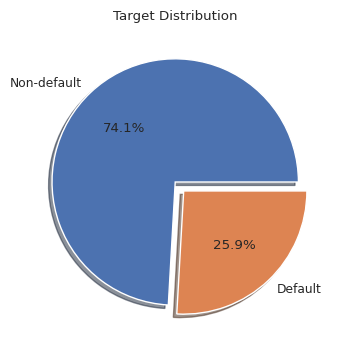

In [9]:
target_counts = data['target'].value_counts(normalize=True)
target_counts.rename({1: 'Default', 0: 'Non-default'}, inplace=True)
# 绘制饼状图
sns.set(font_scale=0.8)
plt.figure(figsize=(4, 4))
plt.pie(target_counts, labels=target_counts.index, explode=(0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

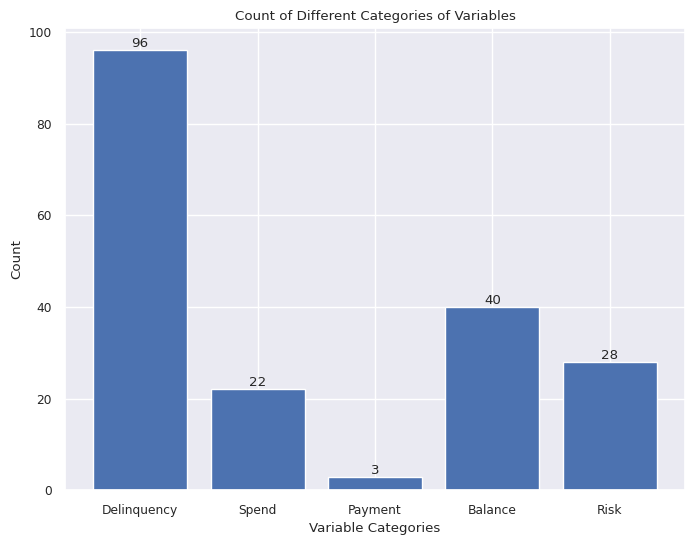

In [10]:
# 提取不同类型的变量
D_vars = [col for col in data.columns if col.startswith('D_')]
S_vars = [col for col in data.columns if col.startswith('S_')]
P_vars = [col for col in data.columns if col.startswith('P_')]
B_vars = [col for col in data.columns if col.startswith('B_')]
R_vars = [col for col in data.columns if col.startswith('R_')]

# 统计每种类型变量的个数
variables_count = {
    'Delinquency': len(D_vars),
    'Spend': len(S_vars),
    'Payment': len(P_vars),
    'Balance': len(B_vars),
    'Risk': len(R_vars)
}

# 绘制展示图
plt.figure(figsize=(8, 6))
bars = plt.bar(variables_count.keys(), variables_count.values())
# 在每个条形上方显示数字
for bar, count in zip(bars, variables_count.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')
plt.title('Count of Different Categories of Variables')
plt.xlabel('Variable Categories')
plt.ylabel('Count')
plt.show()

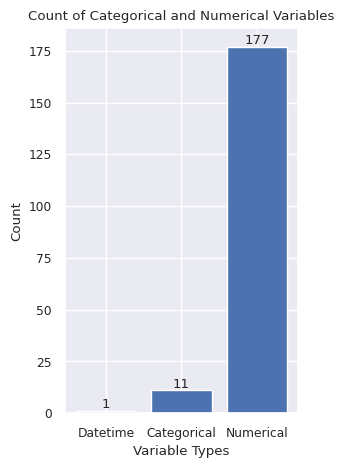

In [139]:
# 提取分类变量和数值型变量
categorical_vars = data.select_dtypes(include='category').columns.tolist()
numerical_vars = data.select_dtypes(include=['float16', 'int64']).columns.tolist()
datetime_vars = data.select_dtypes(include='datetime64').columns.tolist()
# 统计分类变量和数值型变量的个数
variables_count = {
    'Datetime': len(datetime_vars),
    'Categorical': len(categorical_vars),
    'Numerical': len(numerical_vars) - 1  #减去target  
}

# 将字典的值提取为列表
counts = list(variables_count.values())
labels = list(variables_count.keys())

# 绘制展示图
# 绘制展示图
plt.figure(figsize=(3, 5))
sns.set(font_scale=0.8)
bars = plt.bar(variables_count.keys(), variables_count.values())
# 在每个条形上方显示数字
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')
plt.title('Count of Categorical and Numerical Variables')
plt.xlabel('Variable Types')
plt.ylabel('Count')
plt.show()

In [12]:
data[categorical_vars].head()

,D_63,D_64,D_66,D_68,B_30,B_38,D_114,D_116,D_117,D_120,D_126
customer_ID,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,CR,O,NaN,6.0,0.0,2.0,1.0,0.0,4.0,0.0,1.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,CO,O,NaN,6.0,0.0,2.0,1.0,0.0,-1.0,0.0,1.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,CO,R,NaN,6.0,0.0,1.0,1.0,0.0,-1.0,0.0,1.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,CO,O,NaN,3.0,0.0,2.0,1.0,0.0,6.0,0.0,1.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,CO,O,1.0,6.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0


In [13]:
data['D_63'].value_counts()

D_63
CO    344890
CR     73178
CL     35271
XZ      3263
XM      1503
XL       808
Name: count, dtype: int64

In [14]:
data['D_64'].value_counts()

D_64
O     244622
U     132722
R      71532
       10037
-1         0
Name: count, dtype: int64

In [140]:
#对D_63和D_64两列进行频率编码
frequency_map63 = data['D_63'].value_counts(normalize=True).to_dict()
data['D_63'] = data['D_63'].map(frequency_map63)
frequency_map64 = data['D_64'].value_counts(normalize=True).to_dict()
data['D_64'] = data['D_64'].map(frequency_map64)

In [141]:
for col in categorical_vars:
    try:
        data[col] = data[col].astype('float')  # 将数据类型转换为 float 类型
    except KeyError as e:
        print(f"Column '{col}' doesn't exist. Skipping...")  # 输出不存在的列名并跳过转换
    except ValueError as e:
        print(f"Error converting column '{col}' to float: {e}")  # 输出类型转换错误信息

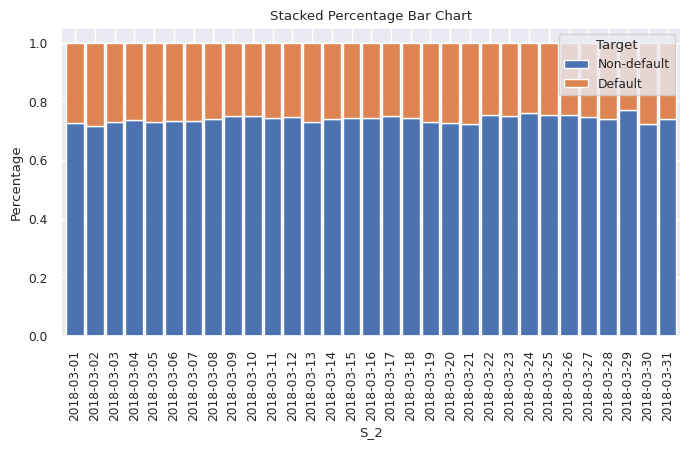

In [17]:
# 将 'S_2' 保留年月日部分
data['S_2'] = data['S_2'].dt.date
per_ = pd.DataFrame({'Non-default':1 - data.groupby(["S_2"])['target'].mean(),
                    'Default':data.groupby(["S_2"])['target'].mean()})
# 绘制堆积百分比柱状图
per_.plot(kind='bar', stacked=True, figsize=(8, 4), width=0.9)
plt.title('Stacked Percentage Bar Chart')
plt.xlabel('S_2')
plt.ylabel('Percentage')
plt.legend(title='Target')
plt.show()

In [150]:
data.drop('S_2', axis=1, inplace=True)

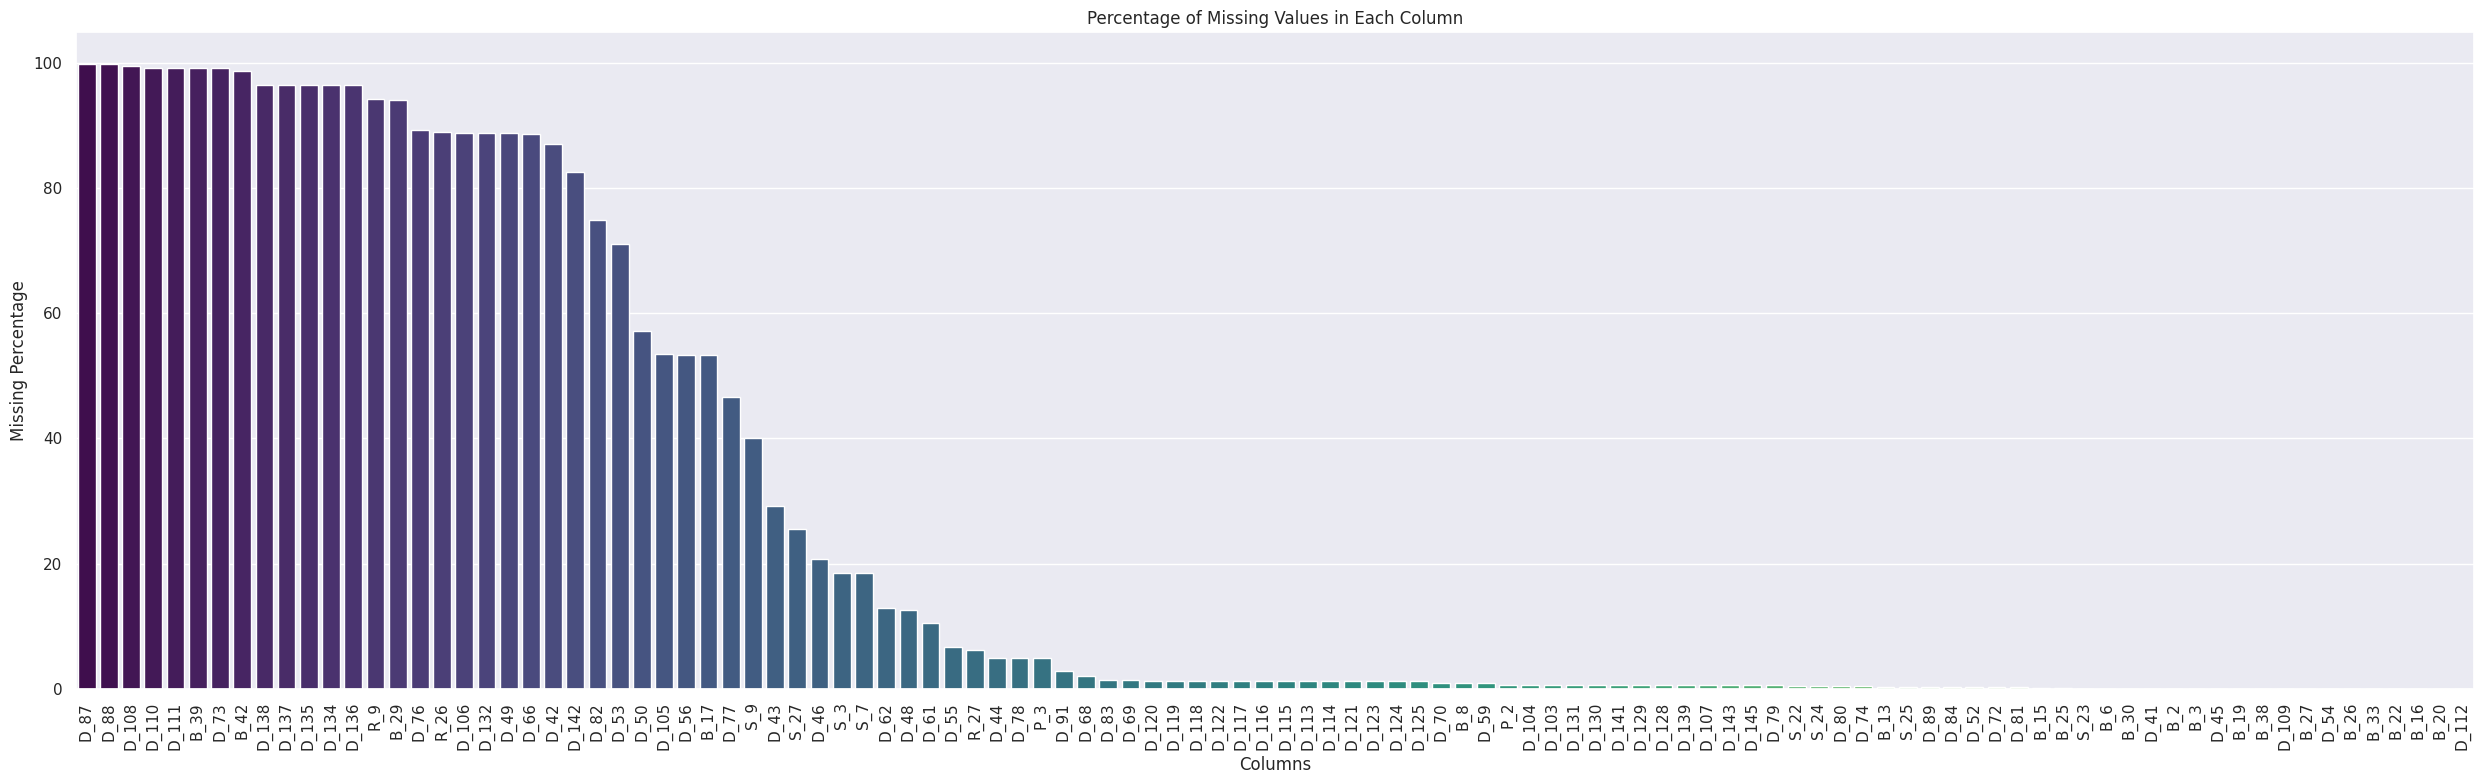

In [142]:
# 计算每列的缺失值占比
missing_values = data.isnull().mean() * 100

# 转换为DataFrame
missing_df = pd.DataFrame({'column': missing_values.index, 'missing_percentage': missing_values.values}).sort_values(by=['missing_percentage'], ascending=False)
missing_df = missing_df[missing_df['missing_percentage'] != 0]
# 绘制柱状图
plt.figure(figsize=(25, 8))
sns.set(font_scale=1)
sns.barplot(x='column', y='missing_percentage', data=missing_df, palette='viridis')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [20]:
missing_df.shape

(108, 2)

In [21]:
missing_df[missing_df['missing_percentage'] > 60].shape

(25, 2)

In [143]:
# 删除缺失值占比高的特征
threshold = 0.6  # 设定阈值
columns_to_drop = missing_df[missing_df['missing_percentage'] > 60].column
data.drop(columns=columns_to_drop, inplace=True)

In [144]:
columns_with_missing = missing_df[missing_df['missing_percentage'] <= 60].column
columns_without_missing = data.columns.difference(columns_with_missing).difference(['target'])

In [24]:
#计算特征变量的均值，对所有列fillna，如果这列本来就没有缺失值，也不会改变这列
mean_fill = data[columns_with_missing].mean()
#查看有缺失值变量的填充值
mean_fill
#发现填充值有nan

D_50     0.0
D_105    NaN
D_56     0.0
B_17     NaN
D_77     0.0
        ... 
B_22     0.0
B_26     0.0
B_27     0.0
B_33     NaN
D_109    0.0
Length: 83, dtype: float64

In [25]:
data.B_17.min()

2e-07

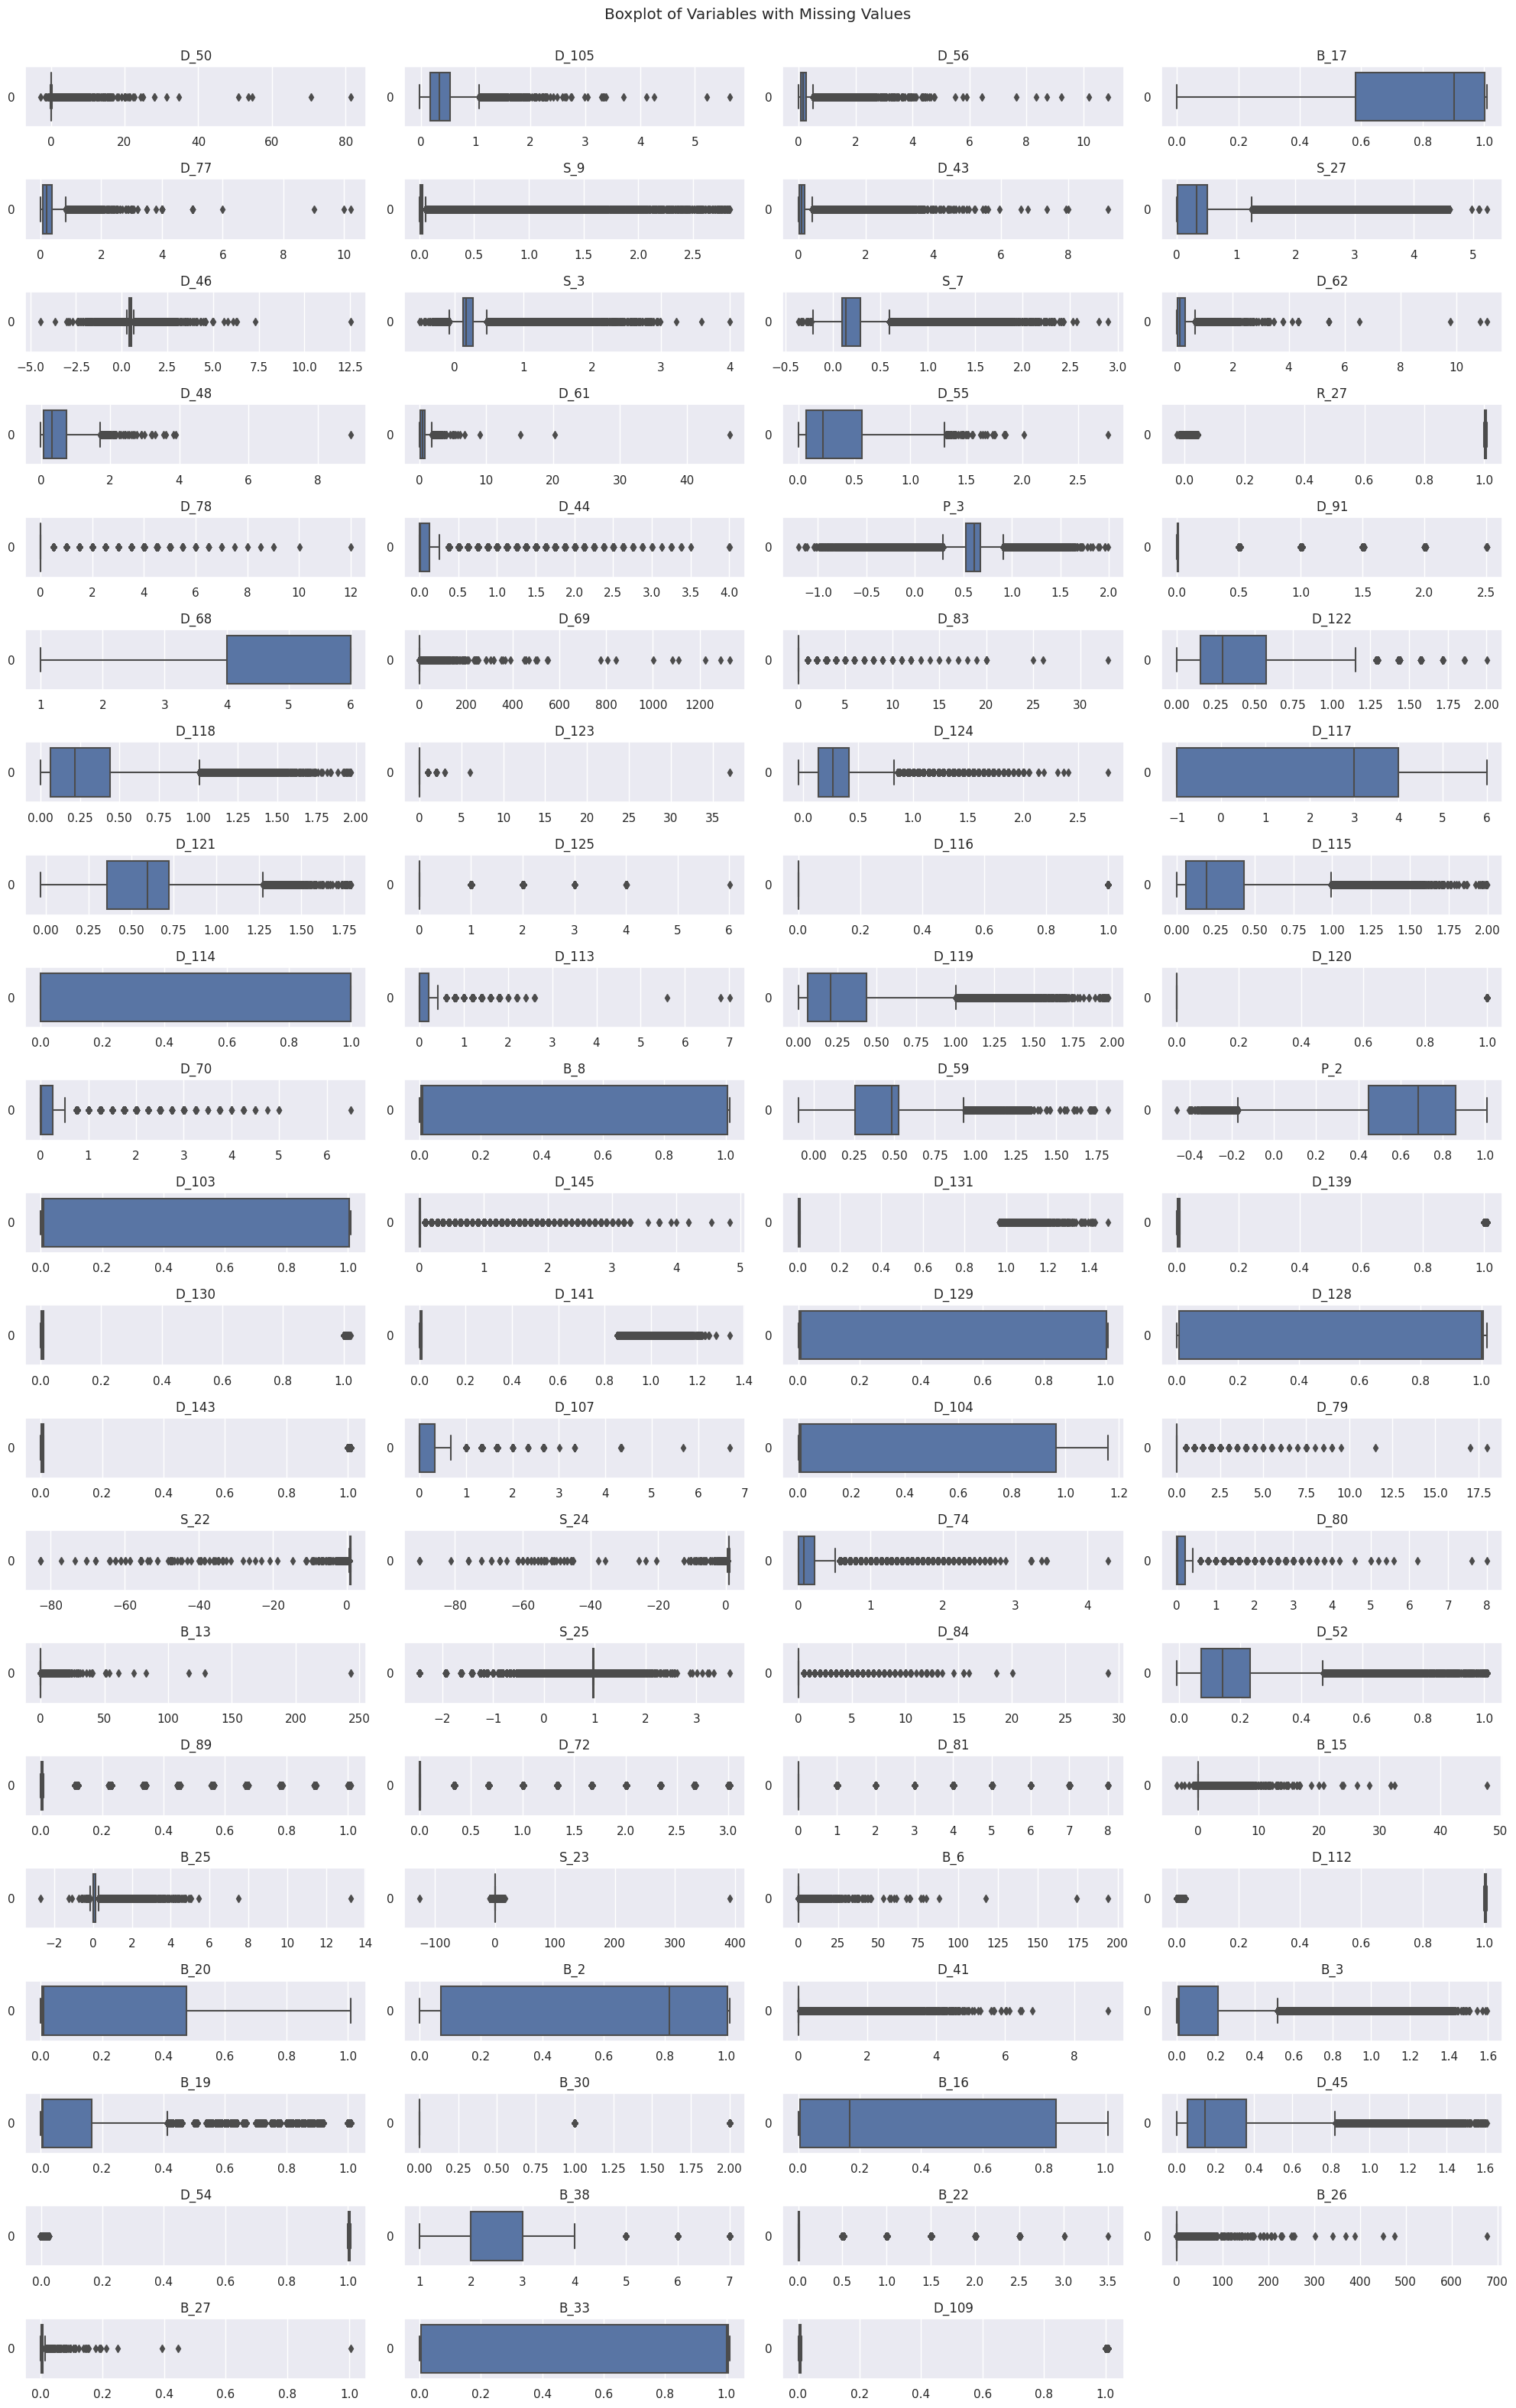

In [26]:
num_plots = len(columns_with_missing)
num_rows = (num_plots // 4) + 1  # 计算子图行数

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 1.5 * num_rows))  # 创建子图

for i, column in enumerate(columns_with_missing):
    row = i // 4
    col = i % 4
    ax = axes[row, col] if num_rows > 1 else axes[col]  
    
    sns.boxplot(data=data[column], orient='h', ax=ax)  # 绘制箱线图，orient='h' 使其横向显示
    ax.set_title(f'{column}')

# 隐藏多余的子图
for i in range(num_plots, num_rows * 4):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')
plt.suptitle('Boxplot of Variables with Missing Values', y=1)
plt.tight_layout()
# plt.show()
plt.savefig('/kaggle/working/box_plot1.png')

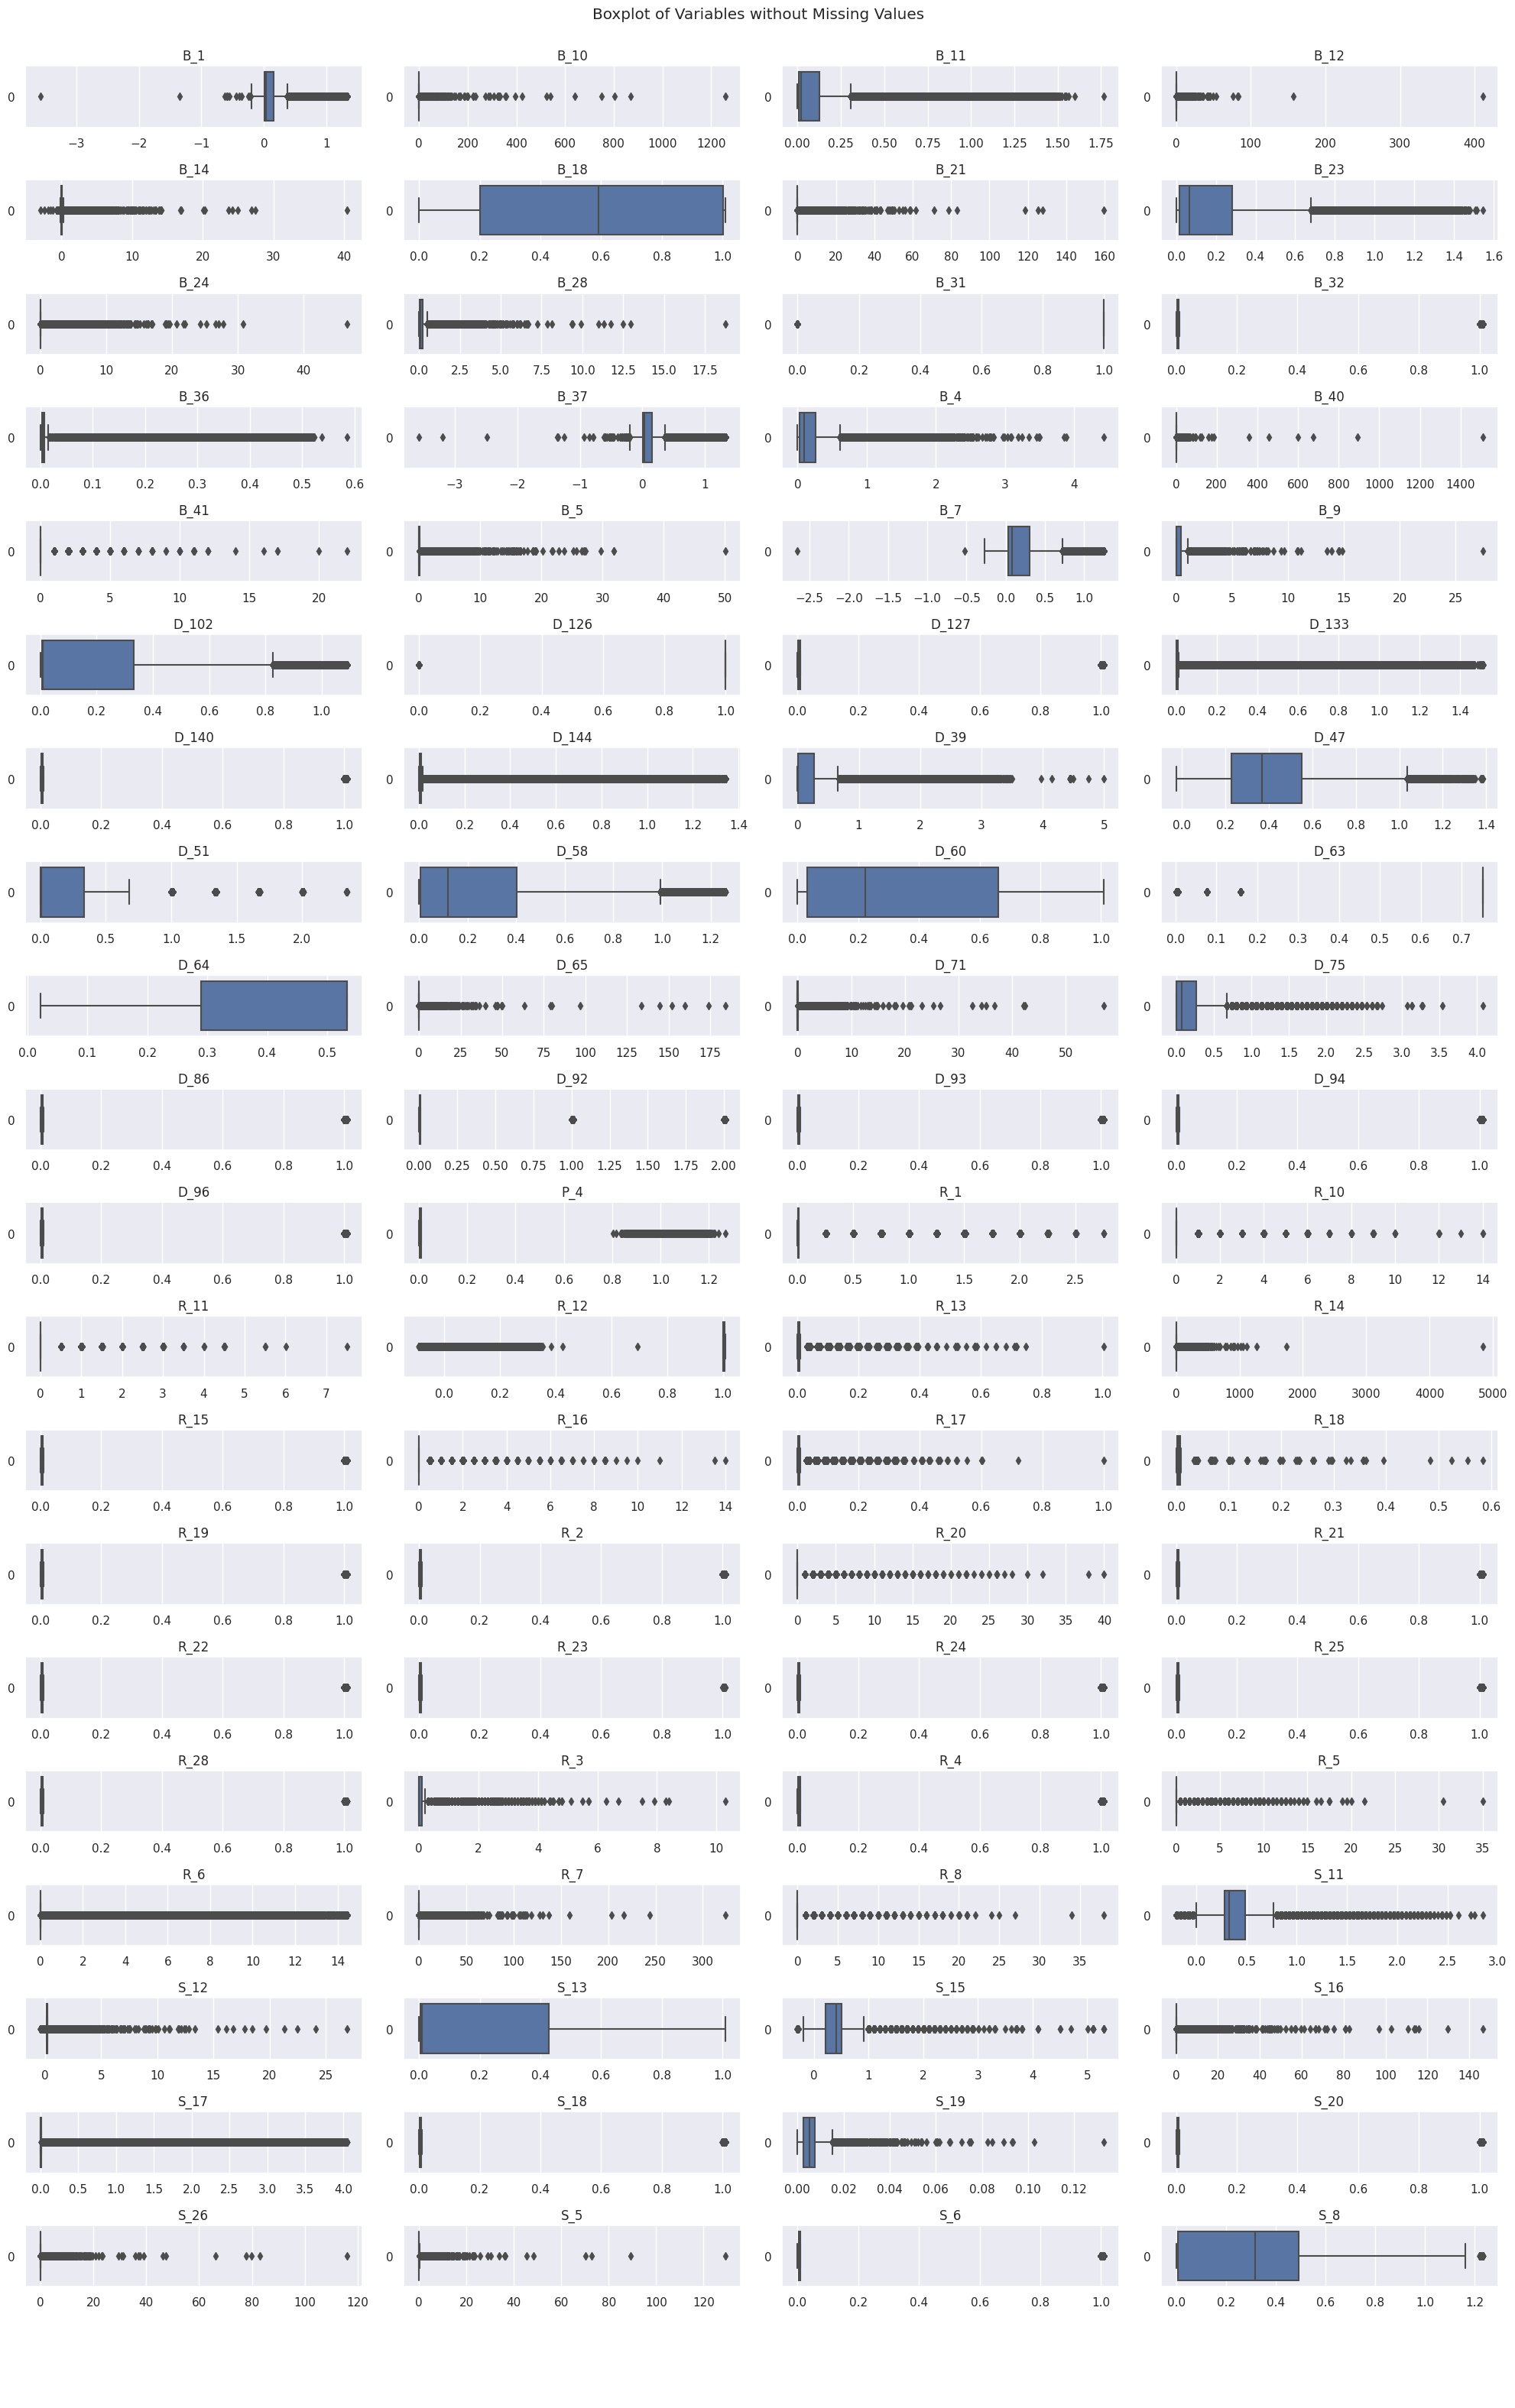

In [27]:
num_plots = len(columns_without_missing)
num_rows = (num_plots // 4) + 1  # 计算子图行数

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 1.5 * num_rows))  # 创建子图

for i, column in enumerate(columns_without_missing):
    row = i // 4
    col = i % 4
    ax = axes[row, col] if num_rows > 1 else axes[col]  # 多行子图和单行子图的索引处理不同
    
    sns.boxplot(data=data[column], orient='h', ax=ax)  # 绘制箱线图，orient='h' 使其横向显示
    ax.set_title(f'{column}')

# 隐藏多余的子图
for i in range(num_plots, num_rows * 4):
    row = i // 4
    col = i % 4
    axes[row, col].axis('off')
plt.suptitle('Boxplot of Variables without Missing Values', y=1)
plt.tight_layout()
# plt.show()
plt.savefig('/kaggle/working/box_plot2.png')

In [145]:
# 处理异常值，替换为边界值
for col in data.columns.difference(['target']):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 替换异常值为边界值
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


In [146]:
data[columns_with_missing].mean()

D_50     0.140158
D_105    0.376611
D_56     0.189433
B_17     0.725230
D_77     0.254465
           ...   
B_33     0.581948
B_22     0.007831
B_16     0.373686
B_20     0.262119
D_112    1.002428
Length: 83, dtype: float64

In [147]:
#处理缺失值
mean_fill_ = data[columns_with_missing].mean()
data[columns_with_missing] = data[columns_with_missing].fillna(mean_fill_)


In [148]:
data.isnull().sum().sum()

0

In [155]:
# 计算特征的方差
variances = data.drop('target', axis=1).var()
# 找到方差为零的特征名称
zero_variance_features = variances[variances == 0].index.tolist()
# 删除方差为零的特征
data.drop(zero_variance_features, axis=1, inplace=True)

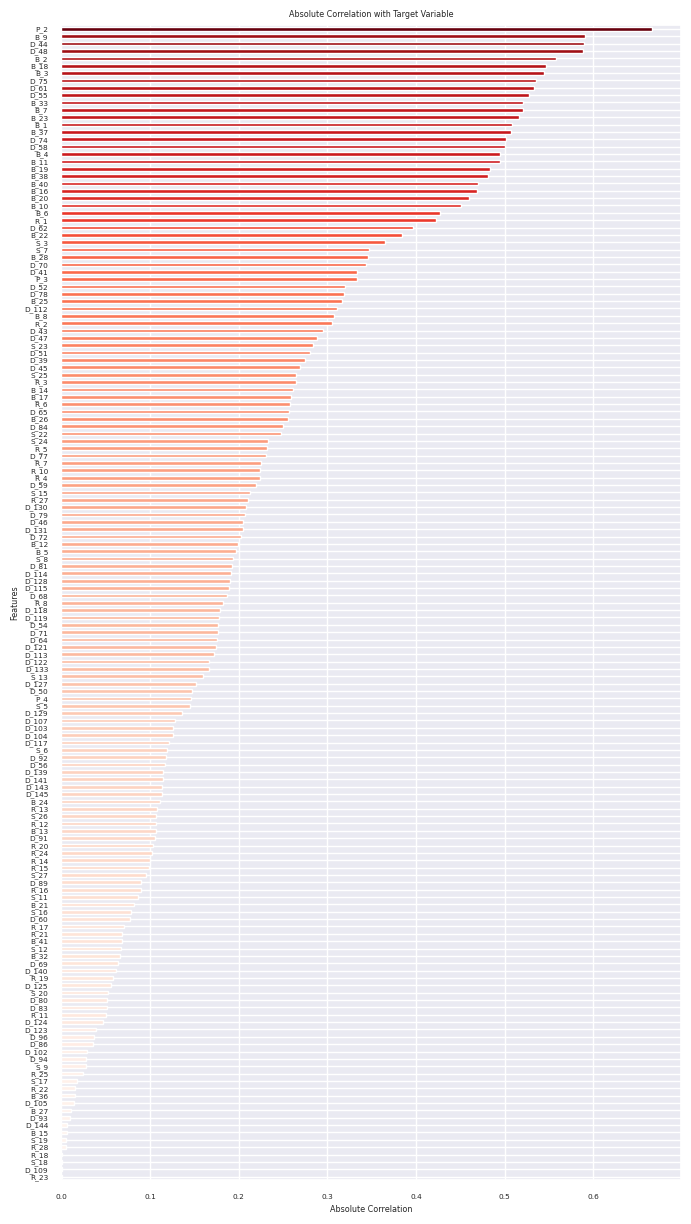

In [157]:
features = data.drop('target', axis=1)  # 提取除目标变量外的特征列

# 计算目标变量与其他特征的相关系数
correlation_matrix = features.corrwith(data['target'])
sorted_correlation = correlation_matrix.abs().sort_values(ascending=True)
# 创建颜色映射（这里使用热图的颜色映射）
cmap = plt.get_cmap('Reds')
# 创建颜色数组，根据相关系数的大小设置颜色的透明度
colors = cmap(sorted_correlation / sorted_correlation.max())
# 创建水平条形图
plt.figure(figsize=(8, 15))
sns.set(font_scale=0.48)
sorted_correlation.plot(kind='barh', color=colors)
plt.title('Absolute Correlation with Target Variable')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
# plt.show()
plt.savefig('/kaggle/working/corr_plot1.png')

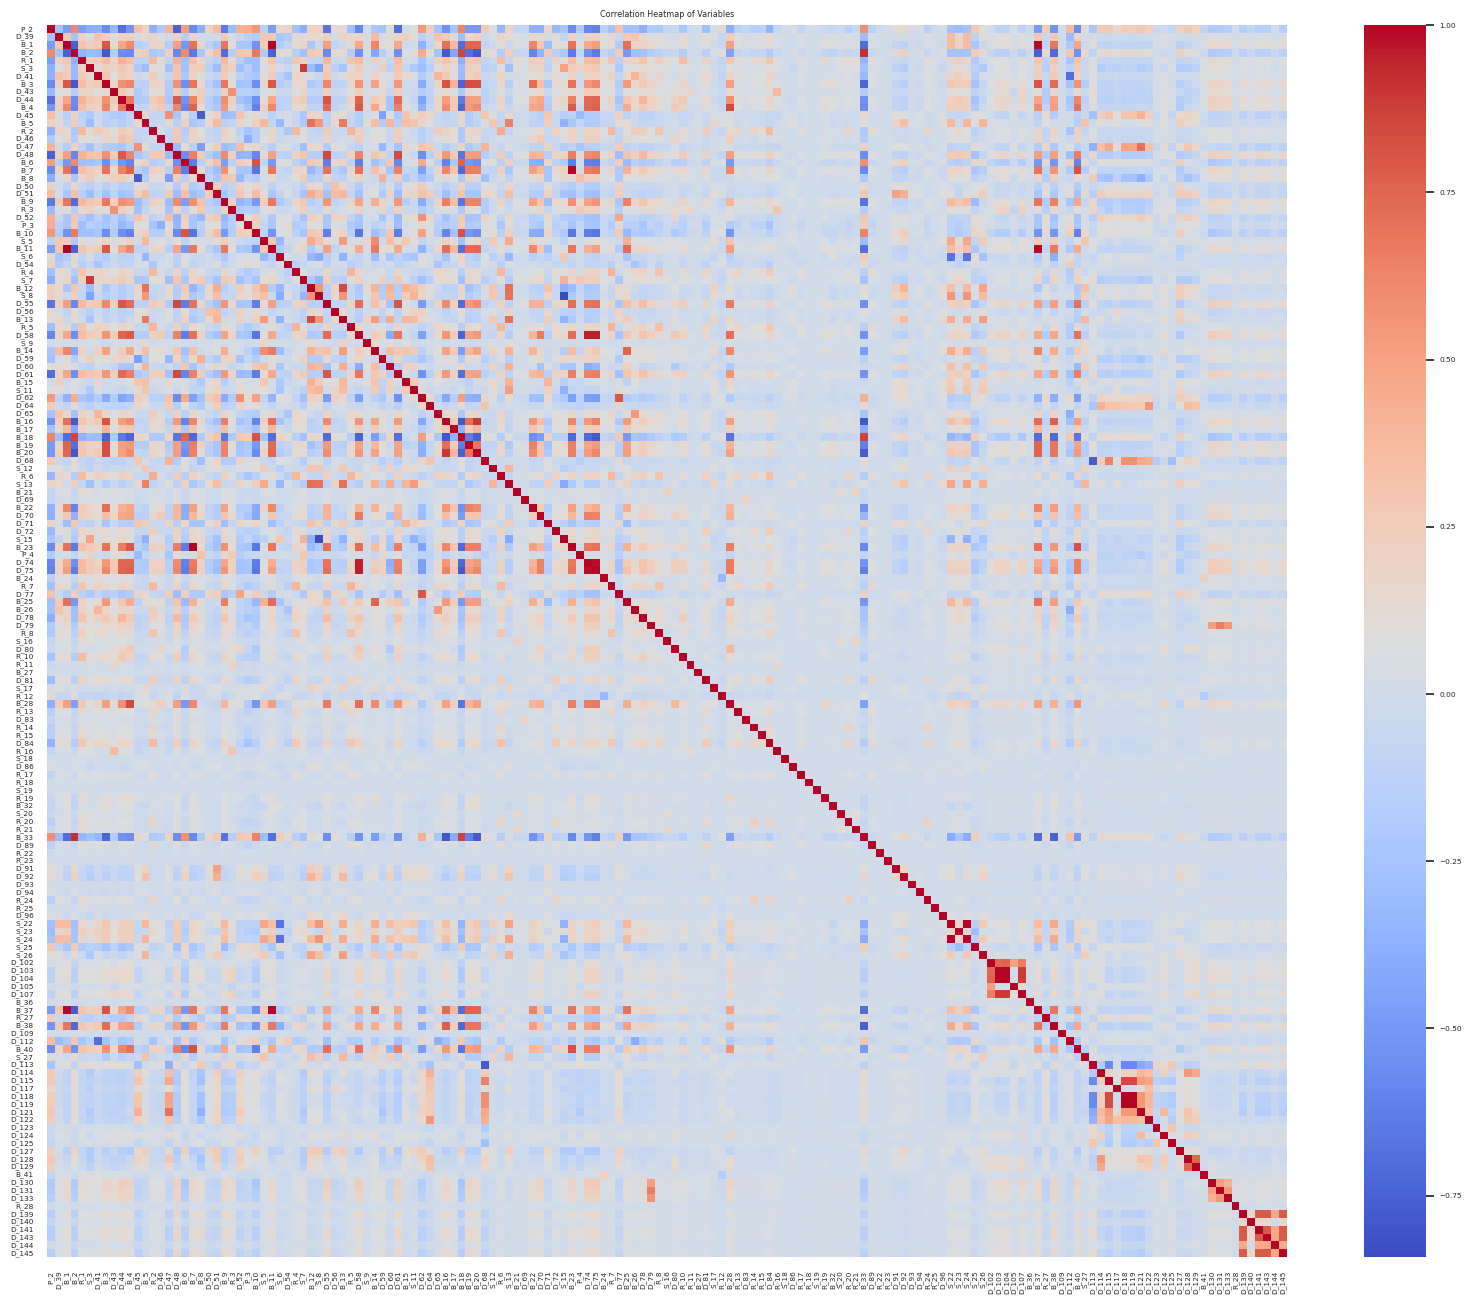

In [158]:
# 计算变量间的相关系数矩阵
correlation_matrix2 = data.drop('target', axis=1).corr()
# 绘制热力图
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix2, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
# plt.show()
plt.savefig('/kaggle/working/corr_plot2.png')

## 建模分析


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [174]:
X = data.drop('target', axis=1)  # 提取特征变量
y = data['target']  # 提取目标变量

# 标准化处理特征变量
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [175]:
#官方给的指标
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()   
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [176]:
# LGBM模型
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# 定义参数空间
param_grid = {
    'device': ['gpu'],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05, 0.01],
}

# 使用 GridSearchCV 进行参数调优
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_log_loss', verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
lgb_best_params = grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   7.0s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   6.7s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   7.1s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   7.9s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   8.5s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   8.8s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=300; total time=   9.1s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=300; total time=   9.1s
[CV] END device=gpu, learning_rate=0.1, max_depth=3, n_estimators=300; total time=   9.2s
[CV] END device=gpu, learning_rate=0.1, max_depth=4, n_estimators=100; total time=   7.1s
[CV] END device=gpu, learning_rate=0.1,

In [194]:
lgb_best_params

{'device': 'gpu', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

In [180]:
lgb_records = []

for params in tqdm(grid_search.cv_results_['params']):
    model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', **params)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, -1]
    acc = model.score(X_test, y_test)
    auc = roc_auc_score(y_test.values, (y_pred>0.5).astype(int))
    amex_score = amex_metric(pd.DataFrame(y_test), pd.DataFrame(y_pred, index=y_test.index, columns=['prediction']))
    lgb_records.append([
        params['learning_rate'], params['max_depth'], params['n_estimators'], acc, auc, amex_score
    ])
    
    
lgb_records = pd.DataFrame(lgb_records, columns=['learning_rate', 'max_depth', 'n_estimators', 'acc', 'auc', 'amex_score'])
lgb_records['learning_rate'] = metric_df['learning_rate'].astype(str)

  0%|          | 0/27 [00:00<?, ?it/s]

In [181]:
lgb_records

,learning_rate,max_depth,n_estimators,acc,auc,amex_score
0,0.1,3,100,0.893989,0.862966,0.766540
1,0.1,3,200,0.896855,0.865324,0.773779
2,0.1,3,300,0.898064,0.866332,0.776446
3,0.1,4,100,0.895939,0.865251,0.771494
4,0.1,4,200,0.897933,0.866842,0.778731
5,0.1,4,300,0.898609,0.867255,0.780359
6,0.1,5,100,0.897410,0.866644,0.774899
7,0.1,5,200,0.898380,0.866823,0.779820
8,0.1,5,300,0.898325,0.866466,0.779176
9,0.05,3,100,0.889457,0.856774,0.753051


In [229]:
for y in ["acc", "auc", "amex_score"]:
    fig = px.bar(
        lgb_records, 
        x="n_estimators", 
        y=y, 
        color="learning_rate", 
        barmode="group",
        facet_col="max_depth",
        height=400,
        text_auto='.4f',
    )
    fig.show()

In [184]:
def train_model(model, train_loader, val_loader, lr, early_stopping, max_epochs):
    
    criterion = nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    best_val_loss = float('inf')
    early_stopping_counter = 0
    best_model = None

    for epoch in range(max_epochs):
        # Training
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device).to(torch.float32), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        # Validation
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device).to(torch.float32), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = accuracy_score(all_targets, all_preds)

            print(f"Epoch {epoch + 1}/{max_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                early_stopping_counter = 0
                best_model = model.state_dict()
            else:
                early_stopping_counter += 1
                if early_stopping_counter >= early_stopping:
                    print(f"Early stopping at epoch {epoch + 1}")
                    break

    model.load_state_dict(best_model)
    return model, best_val_loss


In [185]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train.values, y_train.values, test_size=0.33, random_state=42)

In [186]:
# 神经网络模型定义
class SimpleNN(nn.Module):
    def __init__(self, input_size=83, hidden_size=128, output_size=2):
        super(SimpleNN, self).__init__()
        
        self.in_proj = nn.Linear(input_size, hidden_size)
        self.head = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.in_proj(x))
        x = self.head(x)
        return x


candidate_hidden_size = [128, 256, 512]
candidate_batch_size = [2048, 4096, 8192]
candidate_lr = [1e-1, 1e-2, 1e-3]


hidden_size_score = []
hidden_size_amex_score = []

dl_records = []

best_val_loss = np.inf
dl_best_params = {}

for hidden_size in tqdm(candidate_hidden_size):
    for batch_size in candidate_batch_size:
        for lr in candidate_lr:
    
            train_dataset = TensorDataset(torch.from_numpy(X_train_), torch.from_numpy(y_train_))
            train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_dataset = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
            val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
            test_dataset = TensorDataset(torch.from_numpy(X_test.values), torch.from_numpy(y_test.values))
            test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            model = SimpleNN(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2)

            model, val_loss = train_model(
                model=model,
                train_loader=train_dataloader,
                val_loader=val_dataloader,
                lr=lr,
                early_stopping=5,
                max_epochs=50
            )
            if val_loss < best_val_loss:
                dl_best_params = {
                    'batch_size': batch_size,
                    'hidden_size': hidden_size,
                    'lr': lr
                }

            model.eval()
            model.cuda()
            y_pred = []
            with torch.no_grad():
                for inputs, labels in test_dataloader:
                    logits = model(inputs.cuda().to(torch.float32))
                    loss = nn.CrossEntropyLoss()(logits, labels.cuda())
                    proba = nn.Softmax(dim=-1)(logits)
                    y_pred.append(proba[:, -1].detach().cpu().numpy())

                y_pred = np.concatenate(y_pred)

                acc = accuracy_score(y_test, (y_pred > 0.5).astype(int))
                auc = roc_auc_score(y_test, (y_pred > 0.5).astype(int))
                amex_score = amex_metric(pd.DataFrame(y_test), pd.DataFrame(y_pred, index=y_test.index, columns=['prediction']))
            dl_records.append([
                hidden_size, batch_size, lr, acc, auc, amex_score
            ])


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/50: Train Loss: 0.8494, Val Loss: 0.5916, Val Acc: 0.8823
Epoch 2/50: Train Loss: 0.2789, Val Loss: 0.2386, Val Acc: 0.8954
Epoch 3/50: Train Loss: 0.3187, Val Loss: 0.2476, Val Acc: 0.8935
Epoch 4/50: Train Loss: 0.2417, Val Loss: 0.2463, Val Acc: 0.8940
Epoch 5/50: Train Loss: 0.2377, Val Loss: 0.2388, Val Acc: 0.8949
Epoch 6/50: Train Loss: 0.2367, Val Loss: 0.2428, Val Acc: 0.8944
Epoch 7/50: Train Loss: 0.2353, Val Loss: 0.2413, Val Acc: 0.8935
Early stopping at epoch 7
Epoch 1/50: Train Loss: 0.2496, Val Loss: 0.2352, Val Acc: 0.8955
Epoch 2/50: Train Loss: 0.2330, Val Loss: 0.2335, Val Acc: 0.8965
Epoch 3/50: Train Loss: 0.2307, Val Loss: 0.2340, Val Acc: 0.8962
Epoch 4/50: Train Loss: 0.2281, Val Loss: 0.2479, Val Acc: 0.8913
Epoch 5/50: Train Loss: 0.2278, Val Loss: 0.2375, Val Acc: 0.8946
Epoch 6/50: Train Loss: 0.2251, Val Loss: 0.2353, Val Acc: 0.8956
Epoch 7/50: Train Loss: 0.2244, Val Loss: 0.2404, Val Acc: 0.8931
Early stopping at epoch 7
Epoch 1/50: Train Loss: 

In [195]:
dl_best_params

{'batch_size': 8192, 'hidden_size': 512, 'lr': 0.001}

In [187]:
dl_records = pd.DataFrame(dl_records, columns=['hidden_size', 'batch_size', 'lr', 'acc', 'auc', 'amex_score'])
dl_records['hidden_size'] = dl_records['hidden_size'].astype(str)
dl_records['lr'] = dl_records['lr'].astype(str)
dl_records['batch_size'] = dl_records['batch_size'].astype(str)

In [196]:
dl_records

,hidden_size,batch_size,lr,acc,auc,amex_score
0,128,2048,0.1,0.894163,0.859397,0.762589
1,128,2048,0.01,0.891984,0.868629,0.761479
2,128,2048,0.001,0.895514,0.864951,0.767654
3,128,4096,0.1,0.892344,0.844401,0.762372
4,128,4096,0.01,0.894022,0.856617,0.765259
5,128,4096,0.001,0.895514,0.863073,0.770762
6,128,8192,0.1,0.892540,0.840332,0.762598
7,128,8192,0.01,0.895787,0.859042,0.769766
8,128,8192,0.001,0.895983,0.868174,0.770881
9,256,2048,0.1,0.890001,0.850547,0.747861


In [226]:
for y in ["acc", "auc", "amex_score"]:
    fig = px.bar(
        dl_records, 
        x="batch_size", 
        y=y, 
        color="lr", 
        barmode="group",
        facet_col="hidden_size",
        height=400,
        text_auto='.4f',
        text='acc'
    )
    fig.show()

In [222]:
idx_best_dl_params = (dl_records['hidden_size']==str(dl_best_params['hidden_size']))\
    & (dl_records['lr']==str(dl_best_params['lr']))\
    & (dl_records['batch_size']==str(dl_best_params['batch_size']))

best_dl_record = dl_records[idx_best_dl_params]

idx_best_lgb_params = (lgb_records['max_depth']==lgb_best_params['max_depth'])\
    & (lgb_records['learning_rate']==str(lgb_best_params['learning_rate']))\
    & (lgb_records['n_estimators']==lgb_best_params['n_estimators'])

best_lgb_record = lgb_records[idx_best_lgb_params]

In [224]:
best_lgb_record, best_dl_record

(  learning_rate  max_depth  n_estimators       acc       auc  amex_score
 5           0.1          4           300  0.898609  0.867255    0.780359,
    hidden_size batch_size     lr       acc       auc  amex_score
 26         512       8192  0.001  0.896582  0.858394    0.768772)

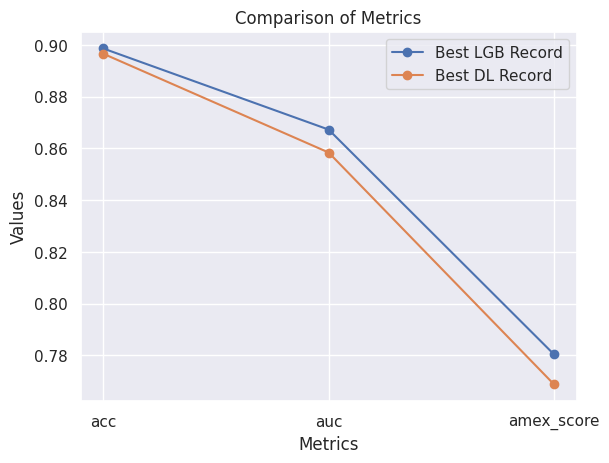

In [225]:
# 提取数据
labels = ['acc', 'auc', 'amex_score']
values_data1 = [best_lgb_record['acc'], best_lgb_record['auc'], best_lgb_record['amex_score']]
values_data2 = [best_dl_record['acc'], best_dl_record['auc'], best_dl_record['amex_score']]

x = range(len(labels))

# 绘制折线图
plt.plot(x, values_data1, marker='o', label='Best LGB Record')
plt.plot(x, values_data2, marker='o', label='Best DL Record')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics')

plt.xticks(x, labels)
plt.legend()
plt.show()